In [60]:
import numpy as np
import pandas as pd
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.metrics import Recall, Precision

import matplotlib.pyplot as plt

In [22]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

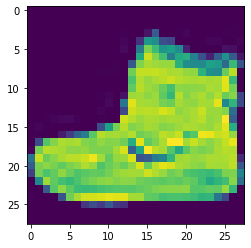

In [23]:
plt.imshow(train_images[0,:,:])
plt.show()

In [24]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

In [25]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [26]:
train_images.shape

(60000, 784)

In [27]:
model1 = Sequential(name='my_model')
model1.add(Dense(128, activation='relu', input_shape=(784,)))

model1.add(Dense(10, activation='softmax'))

In [28]:
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [29]:
model1.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:

# Build the model.
model = Sequential([
  Dense(64, activation='tanh', input_shape=(784,)),
  Dense(64, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [33]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
# Train the model.
model.fit(
  train_images,
  y_t,
  epochs=5,
  batch_size=32, validation_split=0.2
)



# Evaluate the model.
model.evaluate(
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9 2 1 1 6]

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6485 - accuracy: 0.7735 - val_loss: 0.4526 - val_accuracy: 0.8322
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3949 - accuracy: 0.8574 - val_loss: 0.3910 - val_accuracy: 0.8613
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3748 - accuracy: 0.8649 - val_loss: 0.4019 - val_accuracy: 0.8536
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3455 - accuracy: 0.8729 - val_loss: 0.4226 - val_accuracy: 0.8454
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8490
[9 2 1 1 6]
[9 2 1 1 6]


## 1. Опишите - какой результата получен в нейросети в зависимости от:

### 1.1. числа нейронов в слое(для 2-хслойной сети),

In [39]:
for i in (1, 2, 4, 8, 16, 32, 64, 128, 256):

  # build
  model_2l = Sequential([
      Dense(i, activation='relu', input_shape=(784,)),
      Dense(10, activation='softmax')
  ])

  # compile
  model_2l.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )



  # fitting
  model_2l.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2
  )

  result_train = model_2l.evaluate(train_images, to_categorical(train_labels))
  result_test = model_2l.evaluate(test_images, to_categorical(test_labels))

  print(f"{i} neurons accuracy:")
  print(f"\tTrain: {result_train[1]}")
  print(f"\tTest: {result_test[1]}")

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.9859 - accuracy: 0.1984 - val_loss: 1.6935 - val_accuracy: 0.2877
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.6599 - accuracy: 0.2994 - val_loss: 1.5933 - val_accuracy: 0.3298
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5795 - accuracy: 0.3446 - val_loss: 1.5445 - val_accuracy: 0.3621
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5328 - accuracy: 0.3581 - val_loss: 1.5152 - val_accuracy: 0.3543
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.4940 - accuracy: 0.3707
1 neurons accuracy:
	Train: 0.37404999136924744
	Test: 0.37070000171661377
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.9611 - accuracy: 0.2541 - val_loss: 1.3778 - val_accuracy: 0.4762
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2814 - accuracy: 0.5249 - val_loss

Вывод:
 - При увеличении числа нейронов качество повышается. При этом, растет разница между результатом на тесте и трейне, что означает, что понемногу модель переобучается. 
 - Максимальный результат получился при 256 нейронах. При этом, 128 заметно хуже, чем 64. 
 



### 1.2. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).


Возьмем лучшую модель 256 нейронов. 

In [40]:
model_2l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)), 
      Dense(units=10, activation='softmax')
  ])

model_3l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
  ]) 

model_5l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')
  ]) 

model_10l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(units=10, activation='softmax')

  ]) 

In [42]:
# Models
for model in (model_2l, model_3l, model_5l, model_10l):

  # compile
  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )


  # fitting
  model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2
  )

  result_train = model.evaluate(train_images, to_categorical(train_labels))
  result_test = model.evaluate(test_images, to_categorical(test_labels))

  print(f"{model}, accuracy:")
  print(f"\tTrain: {result_train[1]}")
  print(f"\tTest: {result_test[1]}")

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2868 - accuracy: 0.8936 - val_loss: 0.3344 - val_accuracy: 0.8800
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.8993 - val_loss: 0.3526 - val_accuracy: 0.8789
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9041 - val_loss: 0.3282 - val_accuracy: 0.8852
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2412 - accuracy: 0.9109 - val_loss: 0.3360 - val_accuracy: 0.8873
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8798
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9c38427f60>, accuracy:
	Train: 0.9172499775886536
	Test: 0.879800021648407
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6125 - accuracy: 0.7769 - val_loss: 0.4712 - val_accuracy: 0.8332
Epoch 2/5
1500/1500 [======================

Вывод:
- при заданных условиях 256 нейронов лучший резльтат показала сеть с 2 слоями (причем, лучше, чем в прошлый раз). Дальнейшее увеличение количества слоев (важно - с одинаковым количеством нейронов) ухудшает результат. 

### 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [45]:
 optimizers = ['SGD', 'Adam', 'RMSProp']
 
for optim in optimizers: 
  model_2l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(10, activation='softmax')
  ])

  # compile
  model_2l.compile(
      optimizer=optim,
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )



  # fitting
  model_2l.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  result_train = model_2l.evaluate(train_images, to_categorical(train_labels))
  result_test = model_2l.evaluate(test_images, to_categorical(test_labels))

  print(f"{optim} accuracy:")
  print(f"\tTrain: {result_train[1]}")
  print(f"\tTest: {result_test[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8581
SGD accuracy:
	Train: 0.8759166598320007
	Test: 0.8580999970436096
313/313 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.8640
Adam accuracy:
	Train: 0.892133355140686
	Test: 0.8640000224113464
313/313 [==============================] - 1s 2ms/step - loss: 0.3973 - accuracy: 0.8734
RMSProp accuracy:
	Train: 0.9025499820709229
	Test: 0.8733999729156494


Вывод:
- лучший результат у RMSProp
- качество у Adam хуже, чем в предыдущих тестах

### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

На качество влияет подбор оптимального количества слоев и нейронов, а также подбор оптимизатора. При этом, улучшение результата в одном эксперименте не означает такой же результат при этих условиях в другом эксперименте

### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [53]:
model_2l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)), 
      Dense(10, activation='softmax')
  ])

# compile
model_2l.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )


  # fitting
model_2l.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

result_train = model_2l.evaluate(train_images, to_categorical(train_labels))
result_test = model_2l.evaluate(test_images, to_categorical(test_labels))

print(f"accuracy:")
print(f"\tTrain: {result_train[1]}")
print(f"\tTest: {result_test[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8738
accuracy:
	Train: 0.8960833549499512
	Test: 0.8737999796867371


In [56]:
predictions = model_2l.predict(test_images)

# Print our model's predictions.
test_labels_predict = np.argmax(predictions, axis=1)

# Check our predictions against the ground truths.
print(test_labels_predict[:5])
print(test_labels[:5])

[9 2 1 1 6]
[9 2 1 1 6]


In [65]:
labels = np.unique(train_labels)
df = pd.DataFrame(columns=['recall', 'precision'], index=range(10))

for i in labels:
  recall = Recall()
  recall.update_state(y_true=(test_labels == i), 
                      y_pred=(test_labels_predict == i))
  df.loc[i, 'recall'] = recall.result().numpy()

  precision = Precision()
  precision.update_state(y_true=(test_labels == i), 
                         y_pred=(test_labels_predict == i))
  df.loc[i, 'precision'] = precision.result().numpy()

df.index = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

df

,recall,precision
T-shirt/top,0.87,0.790909
Trouser,0.963,0.992783
Pullover,0.815,0.7814
Dress,0.867,0.883792
Coat,0.819,0.774834
Sandal,0.975,0.916353
Shirt,0.604,0.751244
Sneaker,0.899,0.951323
Bag,0.975,0.947522
Ankle boot,0.951,0.944389


Вывод:
- класс Trouser очень хорошо был распознан. Также неплохо 'Sneaker', 'Bag', 'Ankle boot'. 
- Классы 'T-shirt/top', 'Pullover', 'Coat', 'Shirt' требуют дополнительной обработки